In [2]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sn

In [6]:
#load the dataset
dataset=pd.read_csv("c:\\Users\\lsrin\\Downloads\\TS-2\\Adavance_ML\\climate.csv")
print(dataset)

          STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0     72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1     72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2     72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3     72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4     72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   
...           ...                  ...         ...     ...            ...   
2663  72518014735  2022-05-27T23:59:00       SOD         6         PRECIP   
2664  72518014735  2022-05-28T23:59:00       SOD         6         PRECIP   
2665  72518014735  2022-05-29T23:59:00       SOD         6         PRECIP   
2666  72518014735  2022-05-30T23:59:00       SOD         6         PRECIP   
2667  72518014735  2022-05-31T23:59:00       SOD         6         PRECIP   

      BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0

In [8]:
dataset.columns

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName', 'DailyAverageDewPointTemperature',
       'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity',
       'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure',
       'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed',
       'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature',
       'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature',
       'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection',
       'DailyPeakWindSpeed', 'DailyPrecipitation', 'DailySnowDepth',
       'DailySnowfall', 'DailySustainedWindDirection',
       'DailySustainedWindSpeed', 'Sunrise', 'Sunset',
       'WindEquipmentChangeDate'],
      dtype='object')

In [10]:
#DATA PROCESSSING
dataset.head(10)
dataset.tail(8)
dataset.sample(7)
print(dataset.columns)
print(dataset.dtypes)
print(dataset.shape[0]) #column
print(dataset.shape[1]) #rows
print(dataset.size)

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName', 'DailyAverageDewPointTemperature',
       'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity',
       'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure',
       'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed',
       'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature',
       'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature',
       'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection',
       'DailyPeakWindSpeed', 'DailyPrecipitation', 'DailySnowDepth',
       'DailySnowfall', 'DailySustainedWindDirection',
       'DailySustainedWindSpeed', 'Sunrise', 'Sunset',
       'WindEquipmentChangeDate'],
      dtype='object')
STATION                                         int64
DATE                                           object
REPORT_TYPE                

In [14]:
dataset.isnull().sum()

STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemperature          

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                                  2668 non-null   object 
 10  DailyAverage

In [55]:
# Ensure 'DailyPrecipitation' is numeric and fill NaN values with 0
dataset['DailyPrecipitation'] = pd.to_numeric(dataset['DailyPrecipitation'], errors='coerce')
dataset['DailyPrecipitation'].isnull().sum()
dataset['DailyPrecipitation'].fillna(0)

0       0.00
1       0.00
2       0.57
3       0.22
4       0.00
        ... 
2663    0.00
2664    0.04
2665    0.00
2666    0.00
2667    0.00
Name: DailyPrecipitation, Length: 2668, dtype: float64

In [57]:
dataset['DailyPrecipitation'].isnull().sum()

0

In [59]:
#do some statistical for int64,float64
dataNumerical=dataset.select_dtypes(include=['int64','float64'])
#print(dataNumerical.columns)
print(dataNumerical.dtypes)

STATION                                         int64
SOURCE                                          int64
BackupElevation                                 int64
BackupLatitude                                float64
BackupLongitude                               float64
DailyAverageDewPointTemperature               float64
DailyAverageDryBulbTemperature                float64
DailyAverageRelativeHumidity                  float64
DailyAverageSeaLevelPressure                  float64
DailyAverageStationPressure                   float64
DailyAverageWetBulbTemperature                float64
DailyAverageWindSpeed                         float64
DailyCoolingDegreeDays                        float64
DailyDepartureFromNormalAverageTemperature    float64
DailyHeatingDegreeDays                        float64
DailyMaximumDryBulbTemperature                float64
DailyMinimumDryBulbTemperature                float64
DailyPeakWindDirection                        float64
DailyPeakWindSpeed          

In [61]:
#drop the uncessary attribute
dataNumerical = dataNumerical.drop(columns=[
    'STATION', 'SOURCE', 'BackupElevation', 'BackupLatitude',
    'BackupLongitude', 'Sunrise', 'Sunset'
])

In [63]:
dataNumerical.columns

Index(['DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature',
       'DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure',
       'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature',
       'DailyAverageWindSpeed', 'DailyCoolingDegreeDays',
       'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays',
       'DailyMaximumDryBulbTemperature', 'DailyMinimumDryBulbTemperature',
       'DailyPeakWindDirection', 'DailyPeakWindSpeed', 'DailyPrecipitation',
       'DailySustainedWindDirection', 'DailySustainedWindSpeed'],
      dtype='object')

In [65]:
#Using linear Regression
# Features matrix (X) with the temperature column
X = dataNumerical[['DailyAverageDryBulbTemperature']]
# Target vector (y) with precipitation values
y = dataNumerical['DailyPrecipitation']


# Print X and y to verify
print(X)
print(y.isnull().sum())

      DailyAverageDryBulbTemperature
0                               25.0
1                               32.0
2                               27.0
3                               39.0
4                               27.0
...                              ...
2663                            70.0
2664                            68.0
2665                            66.0
2666                            72.0
2667                            79.0

[2668 rows x 1 columns]
0


In [67]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Print the number of rows in X_train
print(X_train.shape[0])


2134


In [69]:
#train the model 
from sklearn.linear_model import LinearRegression
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [75]:
# Make predictions
y_pred = model.predict(X_test)
#print(y_pred)
#y_pred

In [77]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0729113990218066
R-squared: 0.0025889789634933047


## 2. Feature Selection Techniques(Low Variance Filter)
The goal is to remove features with very low variance,as they don’t provide useful information. 
For example, if a feature value barely changes across data samples, it won’t help the model predict precipitation.

## S1: Remove the X feature =DailyPrecipitation
s2:VarianceThreshold wit 0.1 which are <0.1 contain low variances
s3:fit the selectors

In [134]:
from sklearn.feature_selection import VarianceThreshold

# Step 1: Drop the target column (DailyPrecipitation) from the feature matrix
X = dataNumerical.drop(columns=['DailyPrecipitation'])
print("All Features:")
print(X.columns)

# Step 2: Initialize the VarianceThreshold selector with a specific threshold (e.g., 0.1)
selector = VarianceThreshold(threshold=0.1)

# Step 3: Fit the selector on the feature matrix
selector.fit(X)

# Step 4: Calculate variances for each feature
variances = X.var()
print("\nVariance of each feature:")
print(variances)

# Step 5: Identify threshold value
threshold = selector.threshold
print(f"\nVariance Threshold: {threshold}")

# Step 6: Identify selected and removed features based on the threshold
selected_columns = variances[variances >= threshold].index
removed_columns = variances[variances < threshold].index

# Step 7: Print selected and removed features
print("\nSelected Features after Low Variance Filter:")
print(selected_columns)

print("\nRemoved Features with Low Variance:")
print(removed_columns)


All Features:
Index(['DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature',
       'DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure',
       'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature',
       'DailyAverageWindSpeed', 'DailyCoolingDegreeDays',
       'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays',
       'DailyMaximumDryBulbTemperature', 'DailyMinimumDryBulbTemperature',
       'DailyPeakWindDirection', 'DailyPeakWindSpeed',
       'DailySustainedWindDirection', 'DailySustainedWindSpeed'],
      dtype='object')

Variance of each feature:
DailyAverageDewPointTemperature                365.431000
DailyAverageDryBulbTemperature                 351.461615
DailyAverageRelativeHumidity                   179.596433
DailyAverageSeaLevelPressure                     0.050074
DailyAverageStationPressure                      0.048773
DailyAverageWetBulbTemperature                 290.359311
DailyAverageWindSpeed                

In [140]:

X_selected = dataNumerical[selected_columns]  # This extracts the data matrix

# Target variable remains the same
y = dataNumerical['DailyPrecipitation']

# Verify shapes of X and y
print(X_selected.shape)
print(y.shape)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2668, 14)
(2668,)
(2134, 14) (534, 14) (2134,) (534,)


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2LVF = r2_score(y_test, y_pred)
mseLVF = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2LVF:.2f}')
print(f'Mean Squared Error: {mseLVF:.2f}')


R² Score: 0.29
Mean Squared Error: 0.05


### These visualizations will give you:

Feature distributions – Helps understand spread and outliers.
Scatter plot – Visualizes relationships between features and target.
Correlation heatmap – Identifies multicollinearity.
Residual plot – Checks for bias in predictions.
Line plot – Visualizes how well predictions align with actual values.
Bar plot – Summarizes model metrics.

In [151]:
dataNumerical.columns

Index(['DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature',
       'DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure',
       'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature',
       'DailyAverageWindSpeed', 'DailyCoolingDegreeDays',
       'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays',
       'DailyMaximumDryBulbTemperature', 'DailyMinimumDryBulbTemperature',
       'DailyPeakWindDirection', 'DailyPeakWindSpeed', 'DailyPrecipitation',
       'DailySustainedWindDirection', 'DailySustainedWindSpeed'],
      dtype='object')

Applying a High Correlation Filter (HCF) is a great way to reduce feature dimensionality by removing features that are highly correlated with each other. This helps to prevent multicollinearity issues in your model, which can affect the interpretability and performance of regression models.

In [157]:

X_selected = dataNumerical.drop(columns=['DailyPrecipitation'])  # Ensure to remove the target

# Step 1: Calculate the correlation matrix
correlation_matrix = X_selected.corr()

# Step 2: Set a correlation threshold
threshold = 0.8

# Step 3: Identify features to remove
correlated_features = set()  # Set to store features to remove

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Get the name of the feature
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Display correlated features
print("Correlated Features to Remove:")
print(correlated_features)

# Step 4: Drop correlated features from the feature matrix
X_filtered = X_selected.drop(columns=correlated_features)

# Display the remaining features
print("\nFinal Features after High Correlation Filter:")
print(X_filtered.columns)


Correlated Features to Remove:
{'DailyMinimumDryBulbTemperature', 'DailyAverageWetBulbTemperature', 'DailyAverageStationPressure', 'DailyHeatingDegreeDays', 'DailySustainedWindSpeed', 'DailyAverageDryBulbTemperature', 'DailyMaximumDryBulbTemperature', 'DailyPeakWindSpeed'}

Final Features after High Correlation Filter:
Index(['DailyAverageDewPointTemperature', 'DailyAverageRelativeHumidity',
       'DailyAverageSeaLevelPressure', 'DailyAverageWindSpeed',
       'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature',
       'DailyPeakWindDirection', 'DailySustainedWindDirection'],
      dtype='object')


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Use the filtered features for training and evaluation
y = dataNumerical['DailyPrecipitation']

# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2HCF= r2_score(y_test, y_pred)
msehcf= mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2HCF:.2f}')
print(f'Mean Squared Error: {msehcf:.2f}')

R² Score: 0.21
Mean Squared Error: 0.06


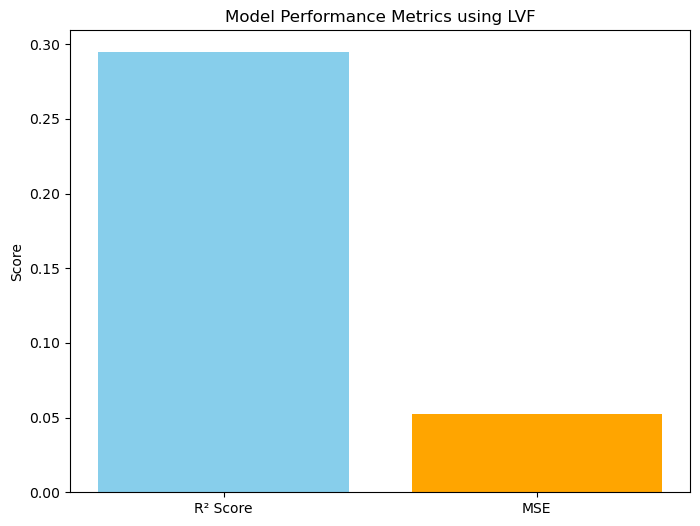

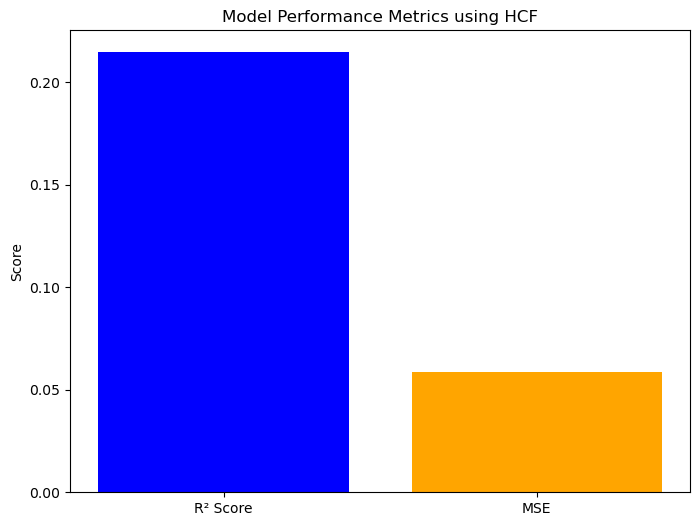

In [167]:
# Example R² Score visualization
metrics = {'R² Score':r2LVF, 'MSE': mseLVF}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange'])
plt.title("Model Performance Metrics using LVF")
plt.ylabel("Score")
plt.show()
#HCF# Example R² Score visualization
metrics = {'R² Score':r2HCF, 'MSE':msehcf}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange'])
plt.title("Model Performance Metrics using HCF")
plt.ylabel("Score")
plt.show()


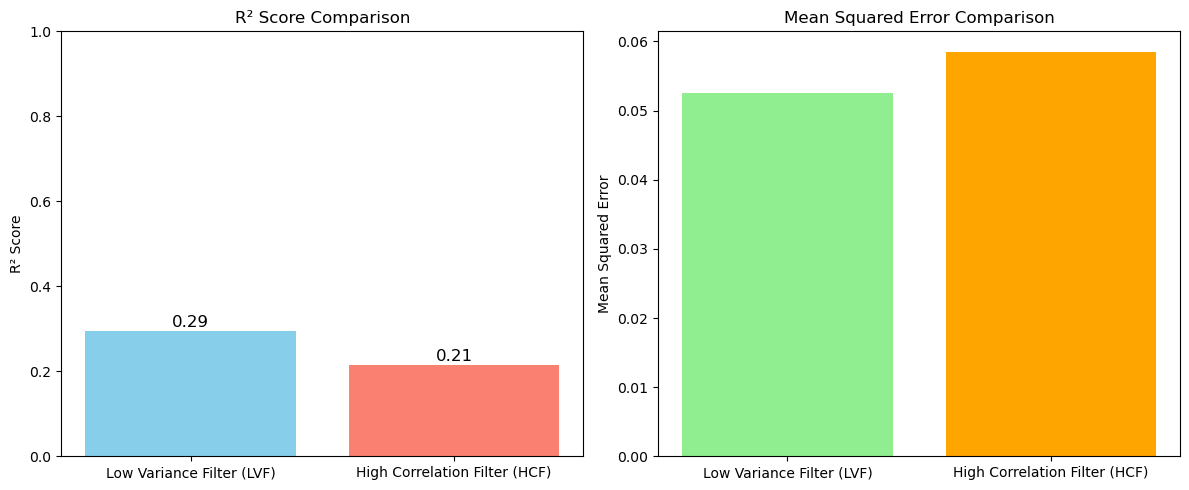

In [175]:
# Data for plotting
methods = ['Low Variance Filter (LVF)', 'High Correlation Filter (HCF)']
r2_scores = [r2LVF, r2HCF]
mse_values = [mseLVF, msehcf]

import matplotlib.pyplot as plt
import numpy as np

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for R² Scores
ax[0].bar(methods, r2_scores, color=['skyblue', 'salmon'])
ax[0].set_ylim(0, 1)  # R² Score ranges from 0 to 1
ax[0].set_title('R² Score Comparison')
ax[0].set_ylabel('R² Score')
for i, v in enumerate(r2_scores):
    ax[0].text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

# Bar plot for Mean Squared Error (MSE)
ax[1].bar(methods, mse_values, color=['lightgreen', 'orange'])
ax[1].set_title('Mean Squared Error Comparison')
ax[1].set_ylabel('Mean Squared Error')
# Show the plots
plt.tight_layout()
plt.show()

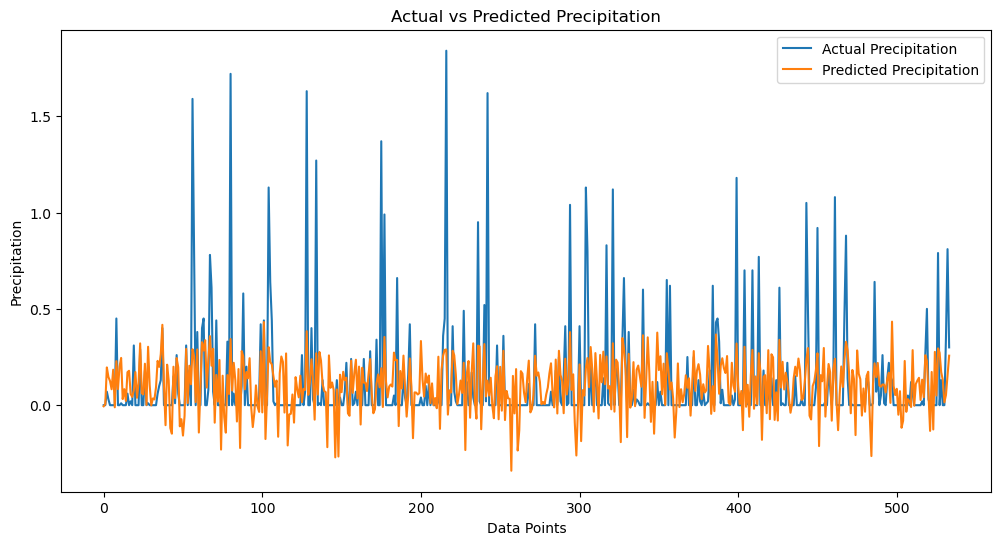

In [179]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Precipitation")
plt.plot(y_pred, label="Predicted Precipitation")
plt.legend()
plt.title("Actual vs Predicted Precipitation")
plt.xlabel("Data Points")
plt.ylabel("Precipitation")
plt.show()

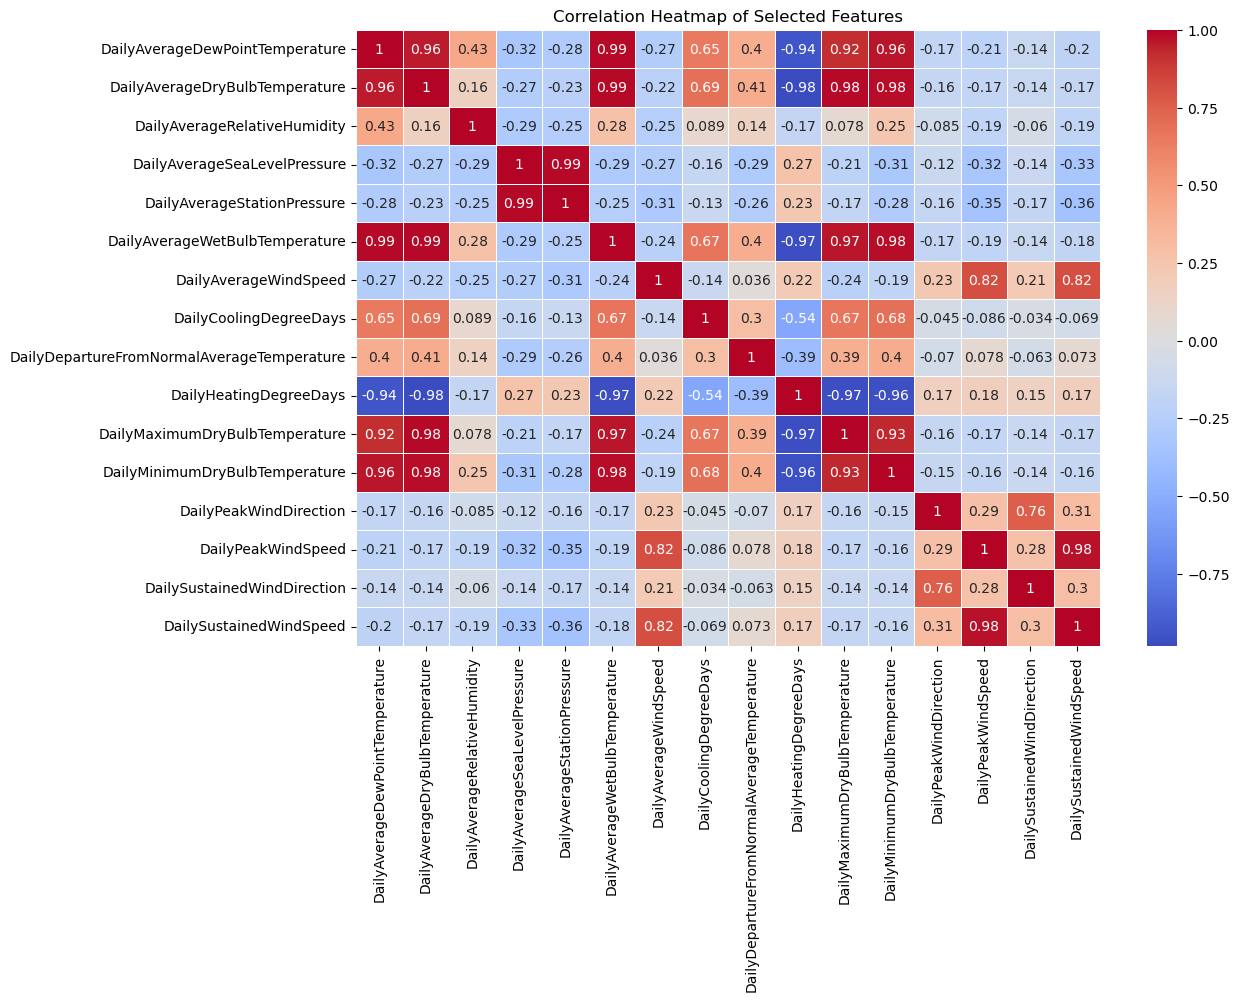

In [183]:
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = X_selected.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()